In [2]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()


(28, 28)
x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


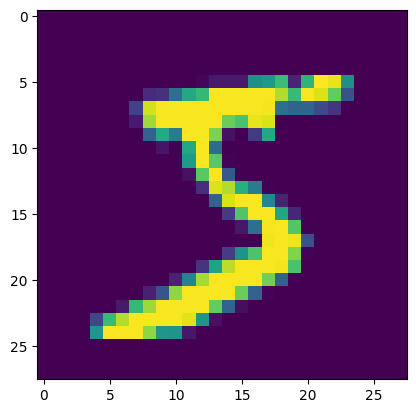

In [13]:
from matplotlib import pyplot as plt
img1 = x_train[0]
plt.imshow(img1)
print(img1.shape)
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

In [6]:
feature_size = img1.shape[0]*img1.shape[1]
print(feature_size)
x_train_format = x_train.reshape(x_train.shape[0],feature_size)
x_test_format = x_test.reshape(x_test.shape[0],feature_size)
print(x_train_format.shape)

784
(60000, 784)


In [19]:
#nomallize data 
x_train_nomal = x_train_format/255
x_test_nomal = x_test_format/255


(60000, 784)


In [15]:
# format the output
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)

print(y_train[0])
print(y_train_format[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation

mlp = Sequential()
mlp.add(Dense(units=392,activation='sigmoid',input_dim=feature_size))
mlp.add(Dense(units=392,activation='sigmoid'))
mlp.add(Dense(units=10,activation='softmax'))
mlp.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 392)               154056    
                                                                 
 dense_2 (Dense)             (None, 10)                3930      
                                                                 
Total params: 465706 (1.78 MB)
Trainable params: 465706 (1.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
mlp.compile(loss='categorical_crossentropy',optimizer = 'adam')

In [18]:
mlp.fit(x_train_nomal,y_train_format,epochs=10)

Epoch 1/10

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3435
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1420
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0911
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0645
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0472
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0366
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0280
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0193
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0173
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0129


In [23]:
import numpy as np

y_train_pred_probs = mlp.predict(x_train_nomal)  
y_train_pre = np.argmax(y_train_pred_probs, axis=1)

y_test_pred_probs = mlp.predict(x_test_nomal)  
y_test_pre = np.argmax(y_test_pred_probs, axis=1)

from sklearn.metrics import accuracy_score

print(y_train_pre)
acc_train = accuracy_score(y_train,y_train_pre)
acc_test = accuracy_score(y_train,y_train_pre)

print('acc_train:',acc_train)
print('acc_test:',acc_test)

313/313 [==============================] - 0s 782us/step
[5 0 4 ... 5 6 8]
acc_train: 0.9968333333333333
acc_test: 0.9968333333333333


AttributeError: 'numpy.int64' object has no attribute 'items'

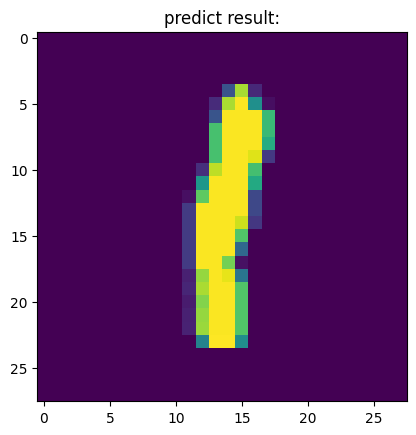

In [30]:

n=39
img2 = x_test[n]
plt.imshow(img2)
plt.title('predict result:',y_test_pre[n])
plt.legend()
plt.show()
